# Data Exploratory Analyzis

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(f'pagamento.csv',sep=',')


In [6]:
df.describe()

,Pagou_Divida,Renda_Presumida,Idade
count,400.000000,400.000000,400.000000
mean,0.357500,5811.875275,37.655000
std,0.479864,2841.413521,10.482877
min,0.000000,1250.000000,18.000000
25%,0.000000,3583.330000,29.750000
50%,0.000000,5833.330000,37.000000
75%,1.000000,7333.330000,46.000000
max,1.000000,12500.000000,60.000000


In [28]:
print(df.info())

print('\n Number of unique values in each column')
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')
    
print('\nNumber of missing values in each column\n',df.isnull().sum())

print('\nNumber of duplicated lines =',df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pagou_Divida     400 non-null    int64  
 1   Renda_Presumida  400 non-null    float64
 2   Idade            400 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 9.5 KB
None

 Number of unique values in each column
Pagou_Divida - 2
Renda_Presumida - 117
Idade - 43

Number of missing values in each column
 Pagou_Divida       0
Renda_Presumida    0
Idade              0
dtype: int64

Number of duplicated lines = 33


# Pre-processamento

In [30]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

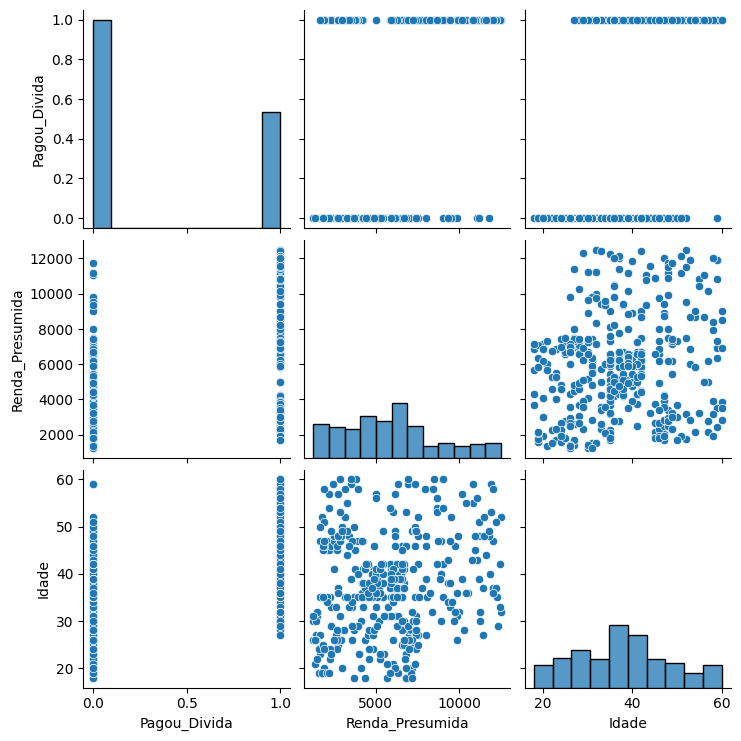

In [33]:
sns.pairplot(df)

## Padronização da escala

In [34]:
df_modelo = df[['Idade','Renda_Presumida']].copy()
x_scaler = StandardScaler()
x_scaler.fit(df_modelo)

StandardScaler()

In [35]:
df_modelo_scaled = pd.DataFrame(
    x_scaler.transform(df_modelo),
    index=df_modelo.index,
    columns=df_modelo.columns
)

In [40]:
df_modelo_scaled

,Idade,Renda_Presumida
0,-1.781797,-1.490047
1,-0.253587,-1.460680
2,-1.113206,-0.785291
3,-1.017692,-0.374182
4,-1.781797,0.183749
...,...,...
395,0.797057,-0.844018
396,1.274623,-1.372586
397,1.179110,-1.460680
398,-0.158074,-1.078938


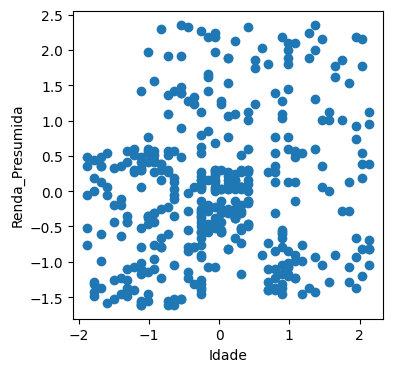

In [47]:
# Plotando
fig = plt.figure(figsize=(4,4))
plt.scatter(df_modelo_scaled['Idade'],
            df_modelo_scaled['Renda_Presumida']);
plt.xlabel('Idade');
plt.ylabel('Renda_Presumida');

In [48]:
modelo_df = KMeans(
    n_clusters=2,
    random_state=42
)

modelo_df.fit(df_modelo_scaled)


KMeans(n_clusters=2, random_state=42)

In [49]:
# Analise de clusters criados

created_clusters = modelo_df.predict(df_modelo_scaled)
created_clusters

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [51]:
modelo_df.cluster_centers_

array([[-0.82201955, -0.37862616],
       [ 0.70731915,  0.32579461]])

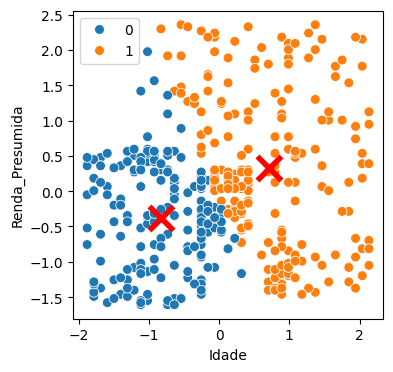

In [55]:
fig = plt.figure(figsize=(4,4))

# Plotando comprimento_petala por largura_petala
sns.scatterplot(x=df_modelo_scaled['Idade'],
                y=df_modelo_scaled['Renda_Presumida'],
                hue=created_clusters, s=50)

# Marcando os centróides
sns.scatterplot(x=modelo_df.cluster_centers_[:,0],
                y=modelo_df.cluster_centers_[:,1], 
                marker='x', s=300, 
                linewidth=4, color='red', zorder=10);

## Identificação do número de clusters

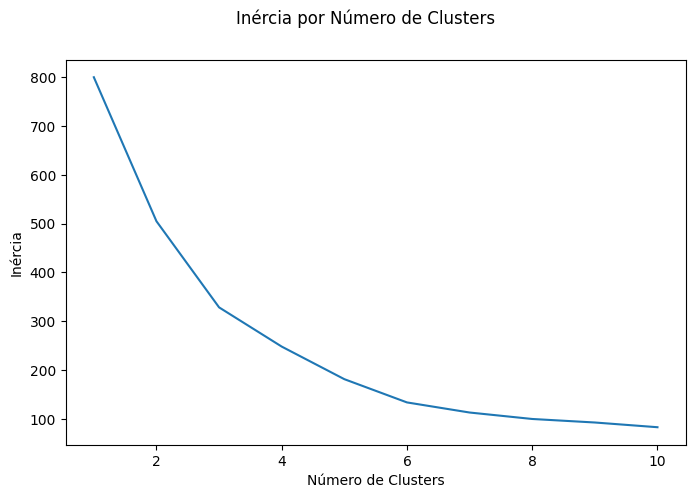

In [56]:
# Utilizando o Método do Cotovelo (Elbow-curve)
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
inercia = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_modelo_scaled)
    inercia.append(kmeans.inertia_)

fig = plt.figure(figsize=(8,5))
graf = sns.lineplot(x=range_n_clusters,
             y=inercia)
graf.figure.suptitle('Inércia por Número de Clusters');
graf.set_xlabel('Número de Clusters');
graf.set_ylabel('Inércia');

In [ ]:
modelo_df_4 = KMeans(
    n_clusters=4,
    random_state=42
)

modelo_df_4.fit(df_modelo_scaled)

KMeans(n_clusters=4, random_state=42)

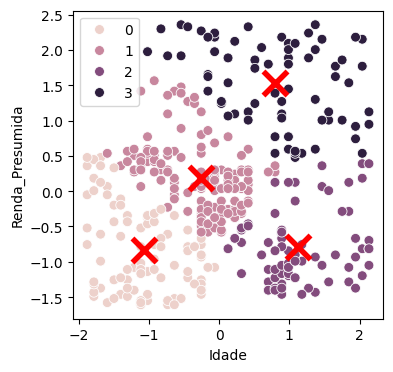

In [60]:
cluster_predito_4 = modelo_df_4.predict(df_modelo_scaled)

fig = plt.figure(figsize=(4,4))

# Plotando comprimento_petala por largura_petala
sns.scatterplot(x=df_modelo_scaled['Idade'],
                y=df_modelo_scaled['Renda_Presumida'],
                hue=cluster_predito_4, s=50)

# Marcando os centróides
sns.scatterplot(x=modelo_df_4.cluster_centers_[:,0],
                y=modelo_df_4.cluster_centers_[:,1], 
                marker='x', s=300, 
                linewidth=4, color='red', zorder=10);

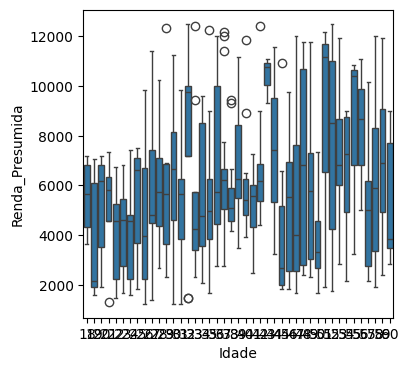

In [65]:
fig = plt.figure(figsize=(4,4))
sns.boxplot(x='Idade',
            y='Renda_Presumida', 
            data=df_modelo);